<h1><center>  <div style="background-color:skyblue;border-radius:8px; padding: 6px;">CA3 - Strategy Thinking</div></center></h1>

In [1]:
# Import the Basic Library's 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# <h3> <center> Load the Data File </center> </h3>

In [2]:
df = pd.read_csv('RIQ02.Dublin.csv')
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2020Q4,One bed,Semi detached house,Dublin,Euro,1171.91
1,RTB Average Monthly Rent Report,2020Q4,One bed,Terrace house,Dublin,Euro,1267.63
2,RTB Average Monthly Rent Report,2020Q4,One bed,Apartment,Dublin,Euro,1447.47
3,RTB Average Monthly Rent Report,2020Q4,Two bed,Semi detached house,Dublin,Euro,1691.12
4,RTB Average Monthly Rent Report,2020Q4,Two bed,Terrace house,Dublin,Euro,1678.96


# <h3> <center> Perform Exploratory Data Analysis </center> </h3>

In [3]:
# Check the Row&Column count. Display the column type
display(df.shape)
display(df.info())

(126, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     126 non-null    object 
 1   Quarter             126 non-null    object 
 2   Number of Bedrooms  126 non-null    object 
 3   Property Type       126 non-null    object 
 4   Location            126 non-null    object 
 5   UNIT                126 non-null    object 
 6   VALUE               126 non-null    float64
dtypes: float64(1), object(6)
memory usage: 7.0+ KB


None

In [4]:
# Display unique values in each column and their count
for col in df.select_dtypes(object):
    unique_value = df[col].value_counts()
    print(f"Unique Number of value in Column '{col}' is '{df[col].nunique()}':")
    print("----------------------")
    print(unique_value.to_string())
    print("\n")

Unique Number of value in Column 'STATISTIC Label' is '1':
----------------------
STATISTIC Label
RTB Average Monthly Rent Report    126


Unique Number of value in Column 'Quarter' is '14':
----------------------
Quarter
2020Q4    9
2021Q1    9
2021Q2    9
2021Q3    9
2021Q4    9
2022Q1    9
2022Q2    9
2022Q3    9
2022Q4    9
2023Q1    9
2023Q2    9
2023Q3    9
2023Q4    9
2024Q1    9


Unique Number of value in Column 'Number of Bedrooms' is '3':
----------------------
Number of Bedrooms
One bed      42
Two bed      42
Three bed    42


Unique Number of value in Column 'Property Type' is '3':
----------------------
Property Type
Semi detached house    42
Terrace house          42
Apartment              42


Unique Number of value in Column 'Location' is '1':
----------------------
Location
Dublin    126


Unique Number of value in Column 'UNIT' is '1':
----------------------
UNIT
Euro    126




In [5]:
# Drop the column 'STATISTIC Label', 'Location' 'UNIT'
if 'STATISTIC Label' in df.columns:
    df = df.drop('STATISTIC Label', axis=1)
    
if 'Location' in df.columns:
    df = df.drop('Location', axis=1)

if 'UNIT' in df.columns:
    df = df.drop('UNIT', axis=1)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,One bed,Semi detached house,1171.91
1,2020Q4,One bed,Terrace house,1267.63
2,2020Q4,One bed,Apartment,1447.47
3,2020Q4,Two bed,Semi detached house,1691.12
4,2020Q4,Two bed,Terrace house,1678.96


In [6]:
# Replace value 'Number of Bedrooms' to 1, 2, 3
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('One bed',1)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Two bed',2)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Three bed',3)

# Replace value 'Property Type' to 0, 1, 2. Apartment-> 0, Terrace house ->1, Semi detached house ->2
df['Property Type'] = df['Property Type'].replace('Apartment',0)
df['Property Type'] = df['Property Type'].replace('Terrace house',1)
df['Property Type'] = df['Property Type'].replace('Semi detached house',2)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,1,2,1171.91
1,2020Q4,1,1,1267.63
2,2020Q4,1,0,1447.47
3,2020Q4,2,2,1691.12
4,2020Q4,2,1,1678.96


In [7]:
# checking for duplicate rows
print("Total number of duplicate rows: ", df.duplicated().sum())

Total number of duplicate rows:  0


# <h3> <center> Display the Correlation Matrix </center> </h3>

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,1,2,1171.91
1,2020Q4,1,1,1267.63
2,2020Q4,1,0,1447.47
3,2020Q4,2,2,1691.12
4,2020Q4,2,1,1678.96


,Quarter,Number of Bedrooms,Property Type,VALUE
0,202004,1,2,1171.91
1,202004,1,1,1267.63
2,202004,1,0,1447.47
3,202004,2,2,1691.12
4,202004,2,1,1678.96


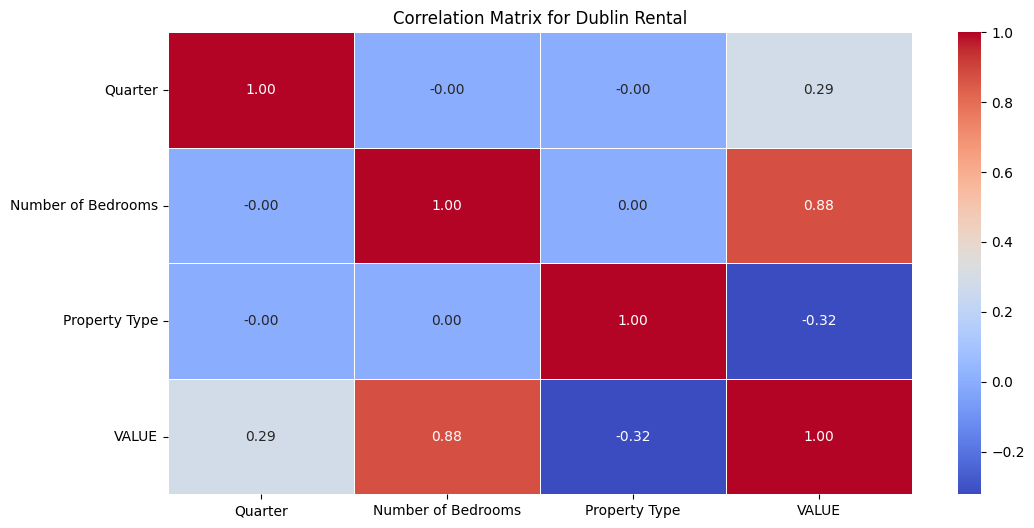

In [8]:
# # Correlation heatmap to check the features that are of high importance to dependent variable
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.copy()
df_corr['Quarter'] = df_corr['Quarter'].str.replace('Q', '0')
corr_matrix = df_corr.corr()

display(df.head())
display(df_corr.head())

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Dublin Rental")
plt.show()

# <h3> <center> Display Plot Based on Property Type </center> </h3>

In [9]:
# Convert 'Quarter' to pandas PeriodIndex
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

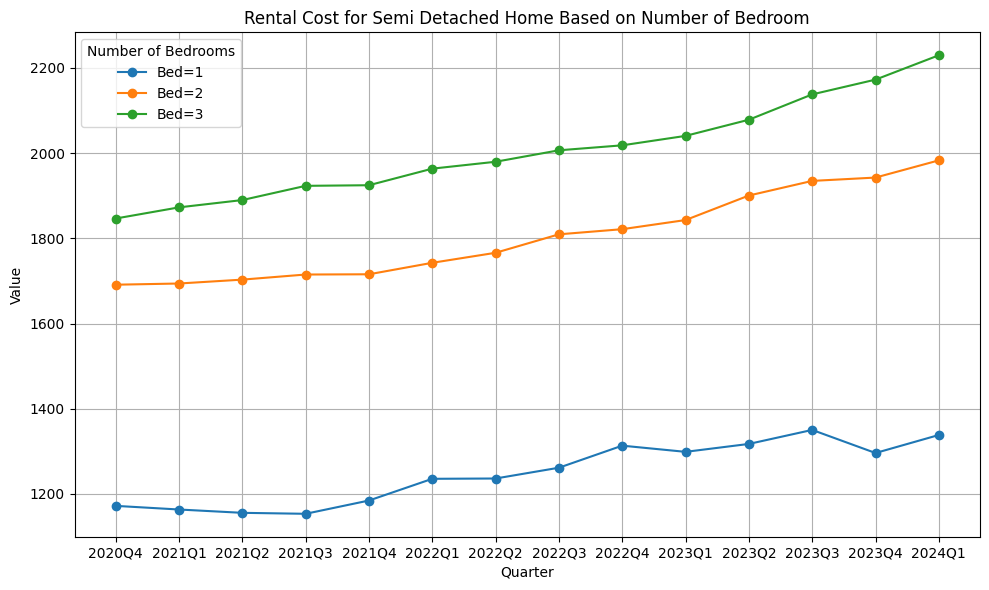

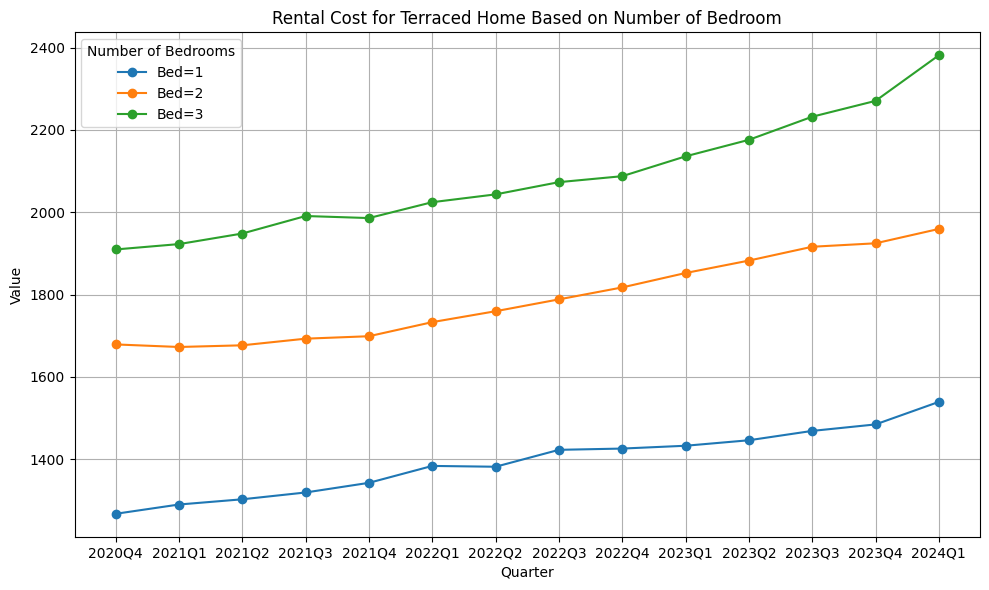

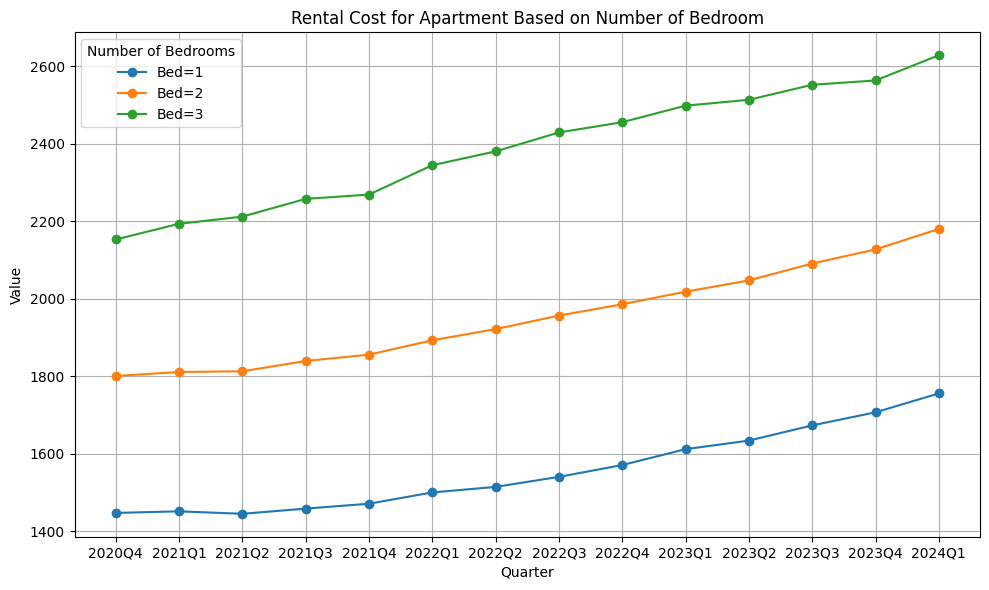

In [10]:
# Display plot for each property type

import seaborn as sns
import matplotlib.pyplot as plt

for type in df['Property Type'].unique():
    df_type = df[df['Property Type'] == type]
    

    plt.figure(figsize=(10, 6))
    for bed in df['Number of Bedrooms'].unique():
        subset = df_type[df_type['Number of Bedrooms'] == bed]
        plt.plot(subset['Quarter'].astype(str), subset['VALUE'], marker='o', label=f'Bed={bed}') 

# Add a title and labels

    if type == 0:
        pt = 'Apartment'
    elif type == 1:
        pt = 'Terraced Home'
    else:
        pt = 'Semi Detached Home'
    
    # plt.title(f'Rental Cost for Property type={type}')
    plt.title(f'Rental Cost for {pt} Based on Number of Bedroom')
    plt.xlabel('Quarter')
    plt.ylabel('Value')
    plt.legend(title='Number of Bedrooms')
    plt.grid(True)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
    plt.show()
    

<h2><center> <div style="background-color:lightpink;border-radius:6px; padding: 4px;">Perform Machine Learning Algorithm - Linear Regression & Random Forest </div></center></h2>

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [12]:
df = df.sort_values('Quarter')
df['TimeIndex'] = range(len(df))  # Creates a numeric trend variable

In [13]:
df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE,TimeIndex
0,2020Q4,1,2,1171.91,0
1,2020Q4,1,1,1267.63,1
2,2020Q4,1,0,1447.47,2
3,2020Q4,2,2,1691.12,3
4,2020Q4,2,1,1678.96,4


In [14]:
x = df[['TimeIndex', 'Number of Bedrooms', 'Property Type']]
y = df['VALUE']

In [15]:
def train(split_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_size,  random_state = 5)

    # Create a RF Regression object
    rf = RandomForestRegressor(n_estimators = 10, min_samples_split=20)

    # Train the Model
    rf.fit(x_train, y_train)
    lr = LinearRegression().fit(x_train, y_train)

    # Test the model
    y_pred_rf_train = rf.predict(x_train)       # Predict training data
    y_pred_rf = rf.predict(x_test)              # Predict test data
    y_pred_lr_train = lr.predict(x_train)              # Predict training data
    y_pred_lr = lr.predict(x_test)              # Predict test data

    # Evaluate the Model 
    mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)   # MSE for training data
    mse_rf = mean_squared_error(y_test, y_pred_rf)                # MSE for test data
    mape_rf_train = mean_absolute_percentage_error(y_train, y_pred_rf_train)
    mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

    r2_rf = r2_score(y_test, y_pred_rf)                           # R2 for test data

    mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)   # MSE for training data
    mse_lr = mean_squared_error(y_test, y_pred_lr)                # MSE for test data
    mape_lr_train = mean_absolute_percentage_error(y_train, y_pred_lr_train)
    mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
    
    r2_lr = r2_score(y_test, y_pred_lr)                           # R2 for test data
    

    # Evalueate the model using Cross Validation Technique
    score_rf_mse = cross_val_score(rf, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    score_rf_mse = -score_rf_mse
    mean_rf_mse = np.mean(score_rf_mse)
    cv_mse_rf = np.sqrt(mean_rf_mse)

    score_lr_mse = cross_val_score(lr, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    score_lr_mse = -score_lr_mse
    mean_lr_mse = np.mean(score_lr_mse)
    cv_mse_lr = np.sqrt(mean_lr_mse)
  
    # Print MSE and LR

    print(f"Train-Test Split for {split_size*100}%: \n")
    
    print(f"Mean Squared Error Value Using RFR: \nTrain: '{mse_rf_train:.2f}', Test: '{mse_rf:.2f}'")
    print(f"Mean Absolute Percentage Error Value Using RFR: \nTrain: '{mape_rf_train:.2f}', Test: '{mape_rf:.2f}'")
    print(f"R2 Score Value Using RFR: {r2_rf:.2f}")
    print(f"Cross Validated, Mean Squared Error Value Using RFR: '{cv_mse_rf:.2f}'")
    
    print(f"\nMean Squared Error Value Using LR: \nTrain: '{mse_lr_train:.2f}', Test: '{mse_lr:.2f}'")
    print(f"Mean Absolute Percentage Error Value Using LR: \nTrain: '{mape_lr_train:.2f}', Test: '{mape_lr:.2f}'")
    print(f"R2 Score Value Using LR: {r2_lr:.2f}")
    print(f"Cross Validated, Mean Squared Error Value Using LR: '{cv_mse_lr:.2f}'")
    
    # Mean and Standard score using Cross Validation
    score_rf = cross_val_score(rf, x_train, y_train, cv=10, scoring='r2')
    print(f"\nMean & Standard Value for RFC using Cross Validation Technique: {np.mean(score_rf)} and {np.std(score_rf)}")

    score_lr = cross_val_score(lr, x_train, y_train, cv=10, scoring='r2')
    print(f"Mean & Standard Value for LR using Cross Validation Technique: {np.mean(score_lr)} and {np.std(score_lr)}")

In [16]:
# train test split size of 20%
train(split_size=0.20)

Train-Test Split for 20.0%: 

Mean Squared Error Value Using RFR: 
Train: '14936.36', Test: '21146.04'
Mean Absolute Percentage Error Value Using RFR: 
Train: '0.05', Test: '0.07'
R2 Score Value Using RFR: 0.86
Cross Validated, Mean Squared Error Value Using RFR: '153.04'

Mean Squared Error Value Using LR: 
Train: '5481.66', Test: '4726.13'
Mean Absolute Percentage Error Value Using LR: 
Train: '0.03', Test: '0.03'
R2 Score Value Using LR: 0.97
Cross Validated, Mean Squared Error Value Using LR: '76.76'

Mean & Standard Value for RFC using Cross Validation Technique: 0.8003193472012379 and 0.0736114297308866
Mean & Standard Value for LR using Cross Validation Technique: 0.9272898201529495 and 0.05741788123587872


In [17]:
# train test split size of 25%
train(split_size=0.25)

Train-Test Split for 25.0%: 

Mean Squared Error Value Using RFR: 
Train: '15234.80', Test: '16567.24'
Mean Absolute Percentage Error Value Using RFR: 
Train: '0.06', Test: '0.06'
R2 Score Value Using RFR: 0.88
Cross Validated, Mean Squared Error Value Using RFR: '153.53'

Mean Squared Error Value Using LR: 
Train: '5319.31', Test: '5404.19'
Mean Absolute Percentage Error Value Using LR: 
Train: '0.03', Test: '0.03'
R2 Score Value Using LR: 0.96
Cross Validated, Mean Squared Error Value Using LR: '74.39'

Mean & Standard Value for RFC using Cross Validation Technique: 0.7673355989460694 and 0.11251118211424282
Mean & Standard Value for LR using Cross Validation Technique: 0.9269902936573425 and 0.07919466373353143


In [18]:
# train test split size of 30%
train(split_size=0.30)

Train-Test Split for 30.0%: 

Mean Squared Error Value Using RFR: 
Train: '18214.16', Test: '18143.23'
Mean Absolute Percentage Error Value Using RFR: 
Train: '0.06', Test: '0.06'
R2 Score Value Using RFR: 0.85
Cross Validated, Mean Squared Error Value Using RFR: '162.40'

Mean Squared Error Value Using LR: 
Train: '5281.14', Test: '5307.25'
Mean Absolute Percentage Error Value Using LR: 
Train: '0.03', Test: '0.03'
R2 Score Value Using LR: 0.96
Cross Validated, Mean Squared Error Value Using LR: '76.17'

Mean & Standard Value for RFC using Cross Validation Technique: 0.7020265366999354 and 0.20147653575036378
Mean & Standard Value for LR using Cross Validation Technique: 0.9357283876486056 and 0.04672524577707735


<h2><center> <div style="background-color:lightpink;border-radius:6px; padding: 4px;">Perform Machine Learning Algorithm - ARIMA </div></center></h2>

In [19]:
# Convert column 'Quarter' to a datetime index

df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q').to_timestamp(how='start')
df.set_index('Quarter', inplace=True)

# Train-test split of 80/20 and using continuous datapoints 
# Since this is time specific data, we avoid random split
train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

In [20]:
print(test)

            Number of Bedrooms  Property Type    VALUE  TimeIndex
Quarter                                                          
2023-07-01                   1              1  1468.94        100
2023-07-01                   1              0  1673.29        101
2023-07-01                   2              2  1934.81        102
2023-07-01                   2              1  1916.18        103
2023-07-01                   2              0  2090.98        104
2023-07-01                   3              2  2137.92        105
2023-07-01                   3              1  2231.96        106
2023-07-01                   3              0  2552.15        107
2023-10-01                   1              2  1296.01        108
2023-10-01                   1              1  1484.68        109
2023-10-01                   1              0  1707.06        110
2023-10-01                   2              2  1942.66        111
2023-10-01                   2              1  1924.56        112
2023-10-01

In [21]:
print(train)

            Number of Bedrooms  Property Type    VALUE  TimeIndex
Quarter                                                          
2020-10-01                   1              2  1171.91          0
2020-10-01                   1              1  1267.63          1
2020-10-01                   1              0  1447.47          2
2020-10-01                   2              2  1691.12          3
2020-10-01                   2              1  1678.96          4
...                        ...            ...      ...        ...
2023-04-01                   2              0  2047.38         95
2023-04-01                   3              2  2078.45         96
2023-04-01                   3              1  2175.87         97
2023-04-01                   3              0  2513.40         98
2023-07-01                   1              2  1350.20         99

[100 rows x 4 columns]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# ARIMA model

model = ARIMA(train['VALUE'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index
test['Forecast'] = forecast

# Error metrics
mae = mean_absolute_error(test['VALUE'], test['Forecast'])
mse = mean_squared_error(test['VALUE'], test['Forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['VALUE'] - test['Forecast']) / test['VALUE'])) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")